In [63]:
#Definición de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.preprocessing import StandardScaler
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

In [64]:
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [65]:
#Creación del dataframe
#datos = pd.read_csv(filepath_or_buffer = "/Users/UTEQ/Documents/UTEQ/Academias/Extracción de conocimiento en bases de datos/analisis.csv")
datos = pd.read_csv("C:\\Users\\espin\\Downloads\\samsung.csv", encoding='latin-1')
datos.head()

,Date,Close,Volume
0,02/01/2008,10880,18047200
1,03/01/2008,10920,19346500
2,04/01/2008,10780,17997350
3,07/01/2008,10380,39787200
4,08/01/2008,10320,24783700


In [66]:
datos.describe()

,Close,Volume
count,2850.000000,2.850000e+03
mean,26611.305263,1.610505e+07
std,11991.608543,8.661794e+06
min,8040.000000,0.000000e+00
25%,16300.000000,1.021426e+07
50%,25600.000000,1.359033e+07
75%,30850.000000,1.960970e+07
max,57220.000000,6.487345e+07


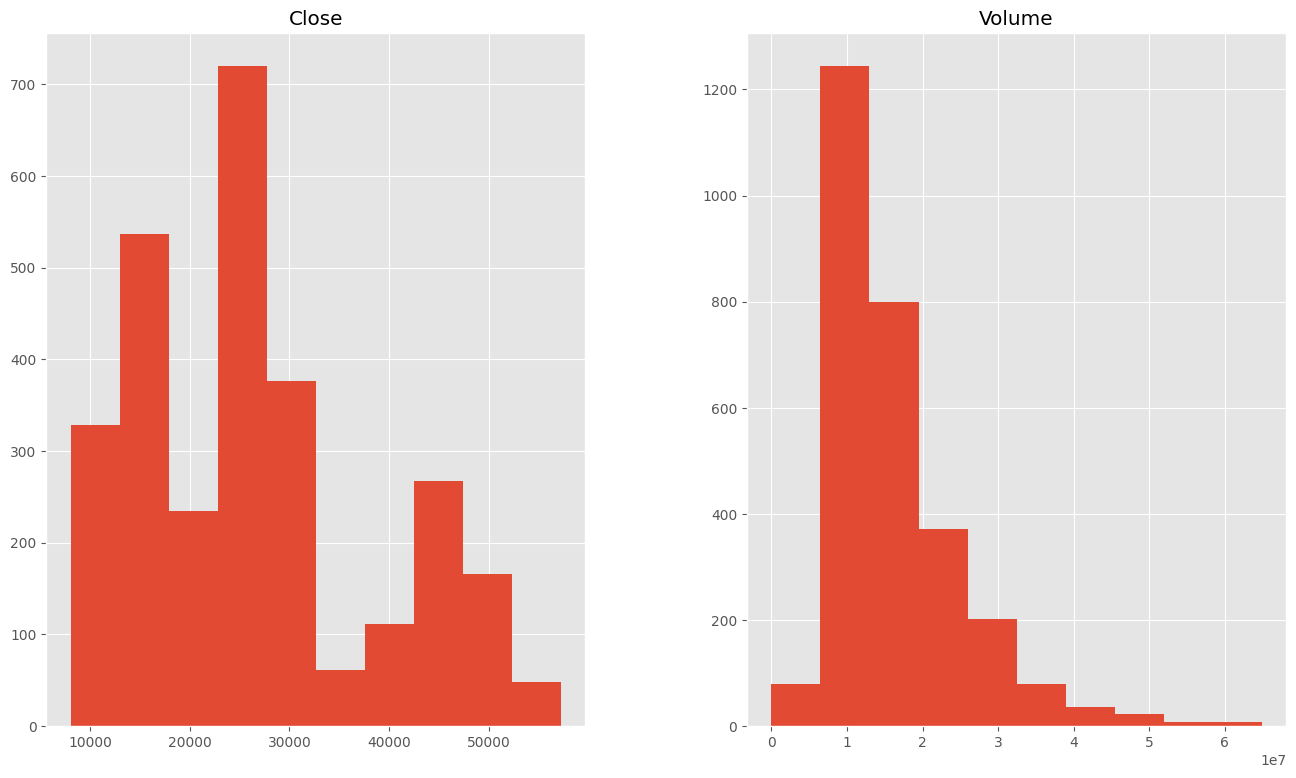

In [67]:
datos.drop(columns=['Date']).hist()
plt.show()

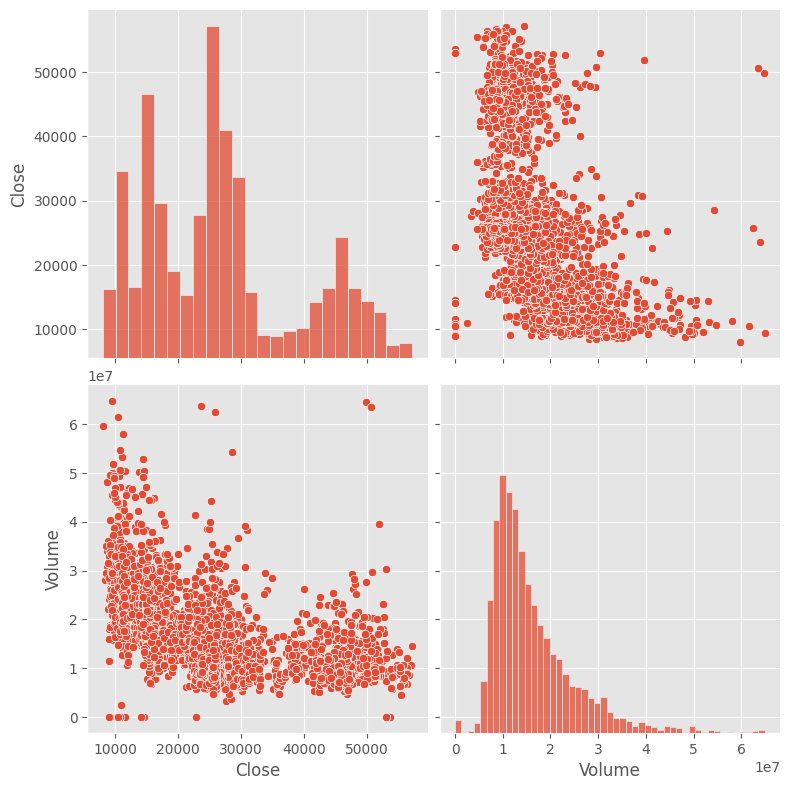

In [68]:
sb.pairplot(datos[['Close', 'Volume']], height=4, kind='scatter')

In [92]:
#Definir entradas
# Seleccionar características numéricas para clustering
X = datos[['Close', 'Volume']]

In [93]:
# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [94]:
# Encontrar el número óptimo de clusters usando el método del codo
wcss = []
for i in range(1, 11):  # Prueba con 1 a 10 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

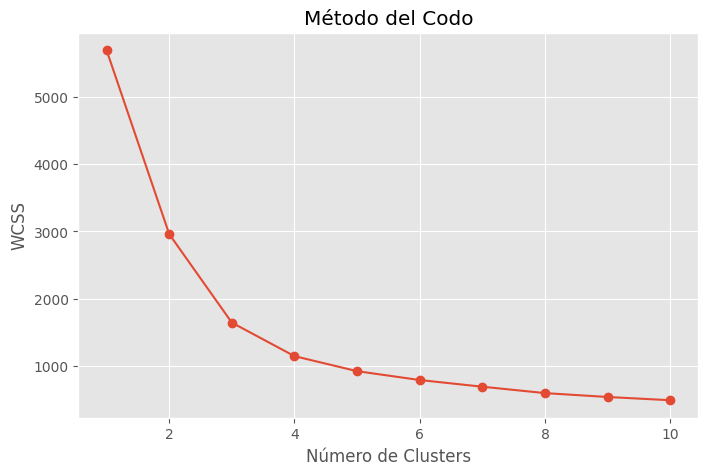

In [95]:
# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')  # Within-cluster sum of squares
plt.show()

In [96]:
#Ejecutar K-Means
kmeans = KMeans(n_clusters=3).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[3.09460569e+04 1.09763327e+07]
 [2.04856181e+04 2.12006288e+07]
 [1.50799583e+04 3.70746246e+07]]


In [97]:
# Predicción de clusteres
labels = kmeans.predict(X)

In [98]:
print(X.shape)
print(C.shape)

(2850, 2)
(3, 2)


In [89]:
# Crear y ajustar el modelo K-Means
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
labels = kmeans.fit_predict(X_scaled)

In [90]:
# Agregar las etiquetas al DataFrame original
datos['Cluster'] = labels

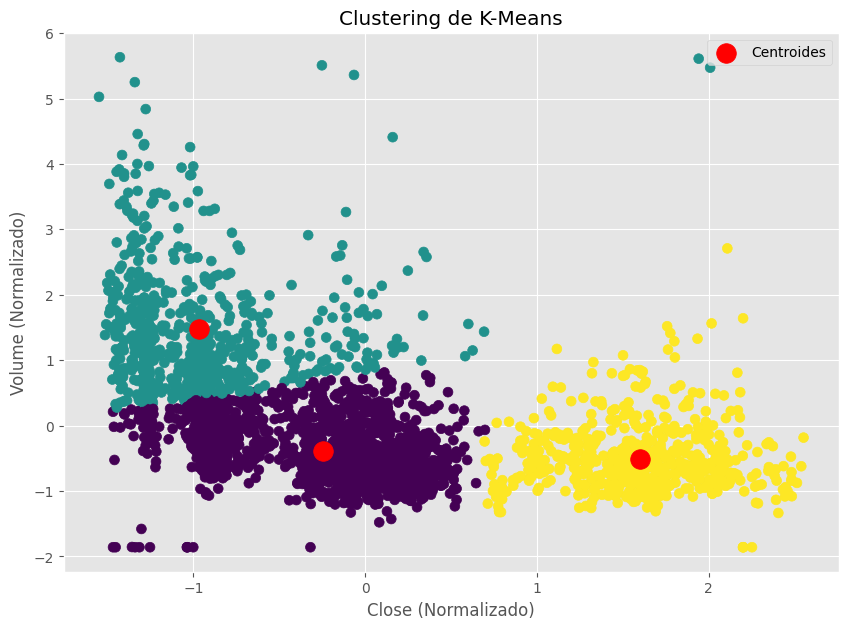

In [91]:
plt.figure(figsize=(10, 7))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroides')
plt.xlabel('Close (Normalizado)')
plt.ylabel('Volume (Normalizado)')
plt.title('Clustering de K-Means')
plt.legend()
plt.show()